In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
%run functions.ipynb

In [28]:
#Load up trainhr.csv, with index being "employee_id"
data_ori = pd.read_csv("train_hr.csv",index_col = "employee_id")
pd.set_option('display.max_columns', 20)

In [29]:
data = data_ori.copy()

In [30]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [31]:
#Understand how many null data in the file
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [32]:
#Missing values imputation
data.education.fillna("Bachelor's",inplace = True)
data.previous_year_rating.fillna(3.0,inplace = True)

In [33]:
#Value count per education level
data.education.value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [34]:
##no_of_trainings
analisis("no_of_trainings",data)

#We can observe that from 6 training sessions upwards the groups are very small (less than 30 rows)

Value:
 no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64 
 
 
 grouped percentage:
 no_of_trainings  no_of_trainings  is_promoted
1                1                0               91.189328
                                  1                8.810672
2                2                0               92.425191
                                  1                7.574809
3                3                0               93.130631
                                  1                6.869369
4                4                0               94.444444
                                  1                5.555556
5                5                0               97.656250
                                  1                2.343750
6                6                0               95.454545
                                  1                4.545455
7                7                0  

In [41]:
#Binning rows where there are more than 6 training sessions into one group.
data["training_sessions"] = np.where(data["no_of_trainings"] >= 6, "6+",data["no_of_trainings"]) 

Value:
 training_sessions
1     44378
2      7987
3      1776
4       468
5       128
6+       71
Name: count, dtype: int64 
 
 
 grouped percentage:
 training_sessions  training_sessions  is_promoted
1                  1                  0              91.189328
                                      1               8.810672
2                  2                  0              92.425191
                                      1               7.574809
3                  3                  0              93.130631
                                      1               6.869369
4                  4                  0              94.444444
                                      1               5.555556
5                  5                  0              97.656250
                                      1               2.343750
6+                 6+                 0              97.183099
                                      1               2.816901
Name: count, dtype: float64


<AxesSubplot:xlabel='training_sessions', ylabel='count'>

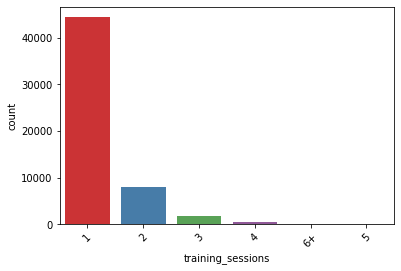

In [43]:
#Analizing variable training_sessions related to Variable y (is_promoted)
analisis("training_sessions",data)
ploteo("training_sessions",data)